## Snowpit Layer Information - RQ1

Initial research question: What is the relationship between snow pit layer hand hardness and grain form?

 Create tables of value and qty for the following properties of layers in a group of snow pits
 

 **Done**
* grainFormPrimary
* grainFormSecondary
* hardness

**Possible**
* depthTop
* thickness
* wetness

Snow Pit Group 1: 200 snow pits from Montana

folder: snowpits_200_MT


In [10]:
# Import librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from xml.dom import minidom
from Layer import Layer

# Define the path to snowpits folder
folder_path = "snowpits_200_MT" # The latest 200 snow pits from MT

In [11]:
# iterate through caaml files and create list of layer objects
# layerslist is a list of layer objects for all the layers in all the caaml files

#caaml_parser in process

layersList = [] # Initialize list of layer objects

# Create a list of all CAAML files in the folder
caaml_files = [f for f in os.listdir(folder_path) if f.endswith('.xml')] # List of all CAAML files in the folder

# Iterate through each file
for file in caaml_files:
        
        # Parse the file
        file_path = folder_path + '/' + file
        doc = minidom.parse(file_path)
        root = doc.documentElement

        # Get all Layer nodes
        layers = root.getElementsByTagName('caaml:Layer')

        # Process each layer
        for layer in layers:
            # Initialize layer object parameters
            depthTop = None
            thickness = None
            grainFormPrimary = None
            grainFormSecondary = None
            hardness = None
            wetness = None

            for node in layer.childNodes:
                if node.localName == 'depthTop':
                    depthTop = node.firstChild.nodeValue                
                if node.localName == 'thickness':
                    thickness = node.firstChild.nodeValue
                if node.localName == 'grainFormPrimary':
                    grainFormPrimary = node.firstChild.nodeValue
                if node.localName == 'grainFormSecondary':
                    grainFormSecondary = node.firstChild.nodeValue
                if node.localName == 'hardness':
                    hardness = node.firstChild.nodeValue
                if node.localName == 'wetness':
                    wetness = node.firstChild.nodeValue

            # Create layer object
            layer_i = Layer(depthTop,thickness,grainFormPrimary,grainFormSecondary,hardness,wetness)
            layersList.append(layer_i)
    

In [12]:
layer1=layersList[1]
print(layer1)
print(vars(layer1))

Layer: 8, 39, DFbk, DF, DFbk, None, F+, None
{'depthTop': '8', 'thickness': '39', 'grainFormPrimary': 'DFbk', 'grainFormPrimary_grainClass': 'DF', 'grainFormPrimary_grainSubClass': 'DFbk', 'grainFormSecondary': None, 'hardness': 'F+', 'hardness_val': 3, 'wetness': None}


In [13]:
# Create a dataframe from the list of layer objects
df = pd.DataFrame([vars(layer) for layer in layersList]) 
print(df)

     depthTop thickness grainFormPrimary grainFormPrimary_grainClass  \
0           0         8             DFbk                          DF   
1           8        39             DFbk                          DF   
2          47         1             MFcr                          MF   
3          48        20             FCxr                          FC   
4          23      None             None                        None   
...       ...       ...              ...                         ...   
1823       43         1               RG                          RG   
1824       44        19               RG                          RG   
1825       63        14               FC                          FC   
1826       29      None             None                        None   
1827       63      None             None                        None   

     grainFormPrimary_grainSubClass grainFormSecondary hardness  hardness_val  \
0                              DFbk               None


Primary Grain Form, Primary Grain Class Distribution:
Grain Form Primary Class  Count  Percentage
                      FC    404        31.3
                      RG    305        23.7
                      DF    183        14.2
                      PP    144        11.2
                      MF    142        11.0
                      IF     59         4.6
                      SH     37         2.9
                      DH     15         1.2


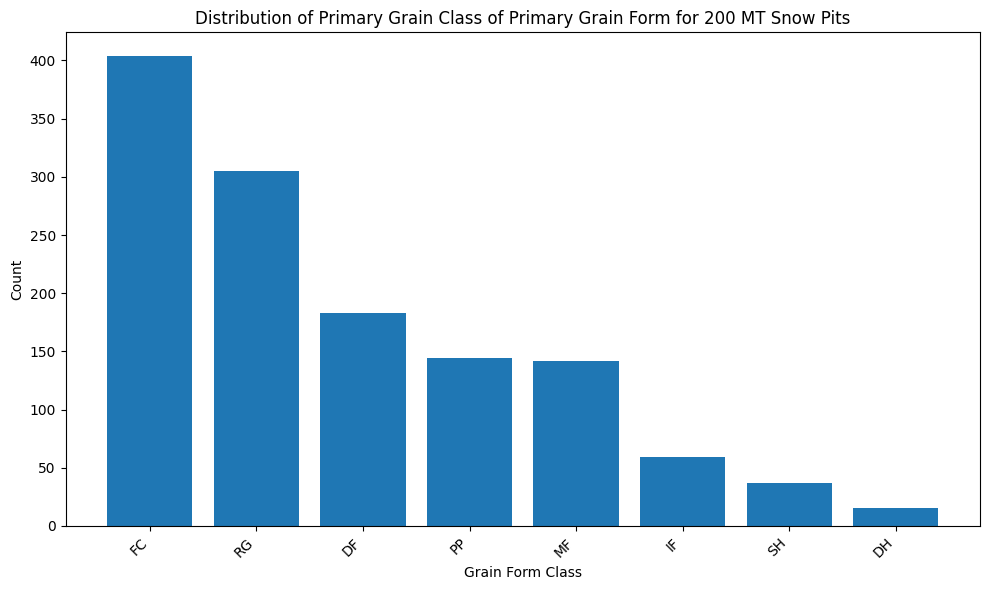

In [14]:
# Create a value counts table for grainFormPrimary
grainFormPrimary_grainClass_table = df['grainFormPrimary_grainClass'].value_counts().reset_index()
grainFormPrimary_grainClass_table.columns = ['Grain Form Primary Class', 'Count']

# Add percentage column
grainFormPrimary_grainClass_table['Percentage'] = (grainFormPrimary_grainClass_table['Count'] / grainFormPrimary_grainClass_table['Count'].sum() * 100).round(1)

# Display the table
print("\nPrimary Grain Form, Primary Grain Class Distribution:")
print(grainFormPrimary_grainClass_table.to_string(index=False))

#Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(grainFormPrimary_grainClass_table['Grain Form Primary Class'], grainFormPrimary_grainClass_table['Count'])
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Primary Grain Class of Primary Grain Form for 200 MT Snow Pits')
plt.xlabel('Grain Form Class')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


Hardness Distribution:
Hardness  Count  Percentage
      4F    241        18.3
      1F    235        17.9
       F    218        16.6
       P    141        10.7
     1F-     77         5.9
     1F+     76         5.8
     4F+     70         5.3
      F+     57         4.3
     4F-     49         3.7
      P+     44         3.3
      F-     35         2.7
      P-     35         2.7
       K     27         2.1
      K-      5         0.4
       I      4         0.3


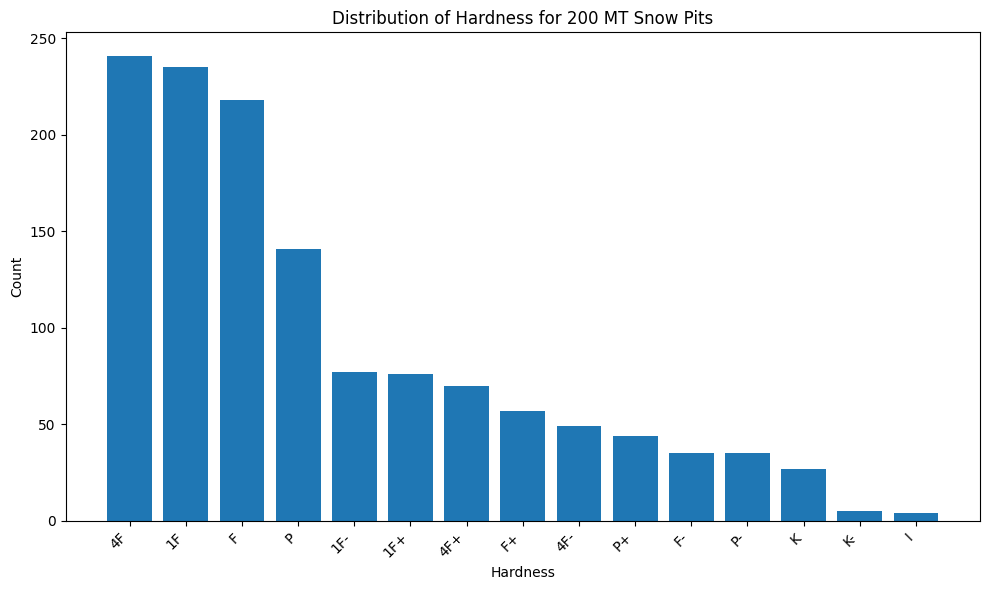

In [15]:
# Create a value counts table for hardness
hardness_table = df['hardness'].value_counts().reset_index()
hardness_table.columns = ['Hardness', 'Count']

# Add percentage column
hardness_table['Percentage'] = (hardness_table['Count'] / hardness_table['Count'].sum() * 100).round(1)

# Display the table
print("\nHardness Distribution:")
print(hardness_table.to_string(index=False))

#Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(hardness_table['Hardness'], hardness_table['Count'])
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Hardness for 200 MT Snow Pits')
plt.xlabel('Hardness')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

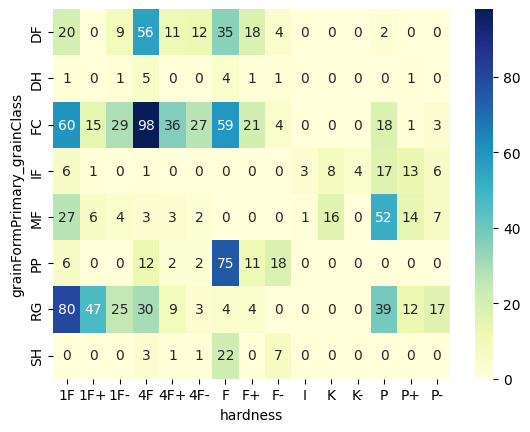

In [22]:
# Create a crosstable
crosstab = pd.crosstab(df['grainFormPrimary_grainClass'], df['hardness'])

hardness_order=['F-','F','F+','4F-','4F','4F+','1F-','1F','1F+','P-','P','P+','K-','K','K+','I-','I','I+']

# Create a heatmap  
sns.heatmap(crosstab, annot=True, cmap='YlGnBu') # Hardness order not specified
#sns.heatmap(crosstab, annot=True, cmap='YlGnBu',xticklabels=hardness_order) # w/hardness order specified
plt.show()

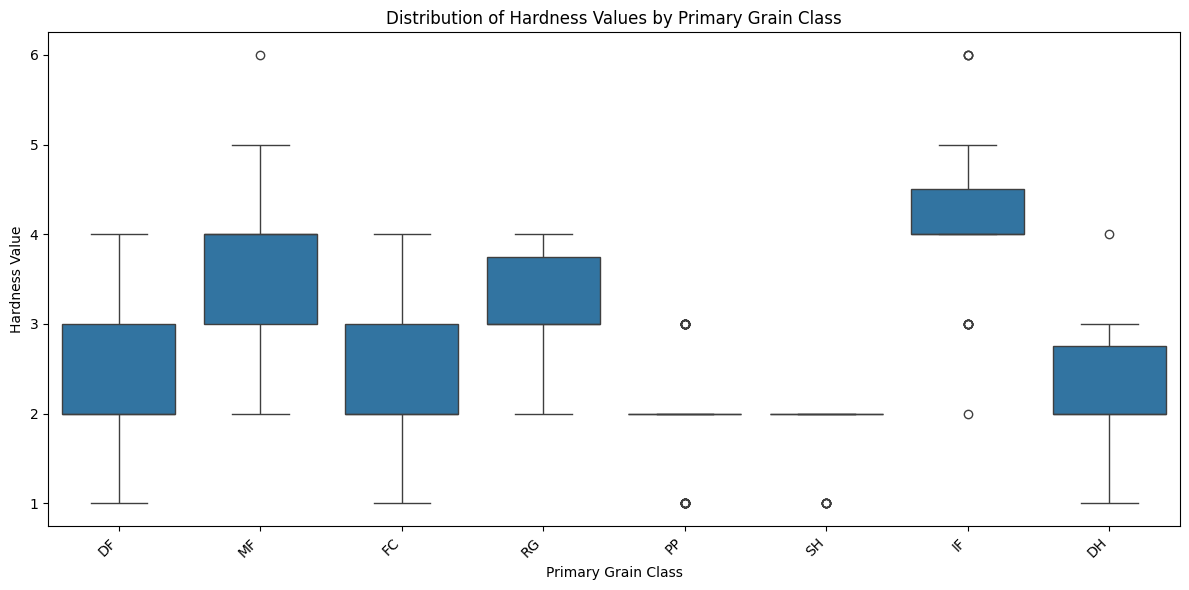


Summary Statistics:
                             count      mean       std  min  25%  50%   75%  \
grainFormPrimary_grainClass                                                   
DF                           167.0  2.281437  0.525107  1.0  2.0  2.0  3.00   
DH                            14.0  2.285714  0.726273  1.0  2.0  2.0  2.75   
FC                           371.0  2.444744  0.623021  1.0  2.0  2.0  3.00   
IF                            59.0  4.152542  0.761431  2.0  4.0  4.0  4.50   
MF                           135.0  3.740741  0.772310  2.0  3.0  4.0  4.00   
PP                           126.0  1.992063  0.529090  1.0  2.0  2.0  2.00   
RG                           270.0  3.081481  0.645854  2.0  3.0  3.0  3.75   
SH                            34.0  1.794118  0.410426  1.0  2.0  2.0  2.00   

                             max  
grainFormPrimary_grainClass       
DF                           4.0  
DH                           4.0  
FC                           4.0  
IF           

In [8]:
## Create box plot of Primary Grain Class and Hardness Value

# Create boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='grainFormPrimary_grainClass', y='hardness_val', data=df)

# Customize the plot
plt.title('Distribution of Hardness Values by Primary Grain Class')
plt.xlabel('Primary Grain Class')
plt.ylabel('Hardness Value')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent label cutoff

plt.show()

# Optional: Print summary statistics
print("\nSummary Statistics:")
print(df.groupby('grainFormPrimary_grainClass')['hardness_val'].describe())

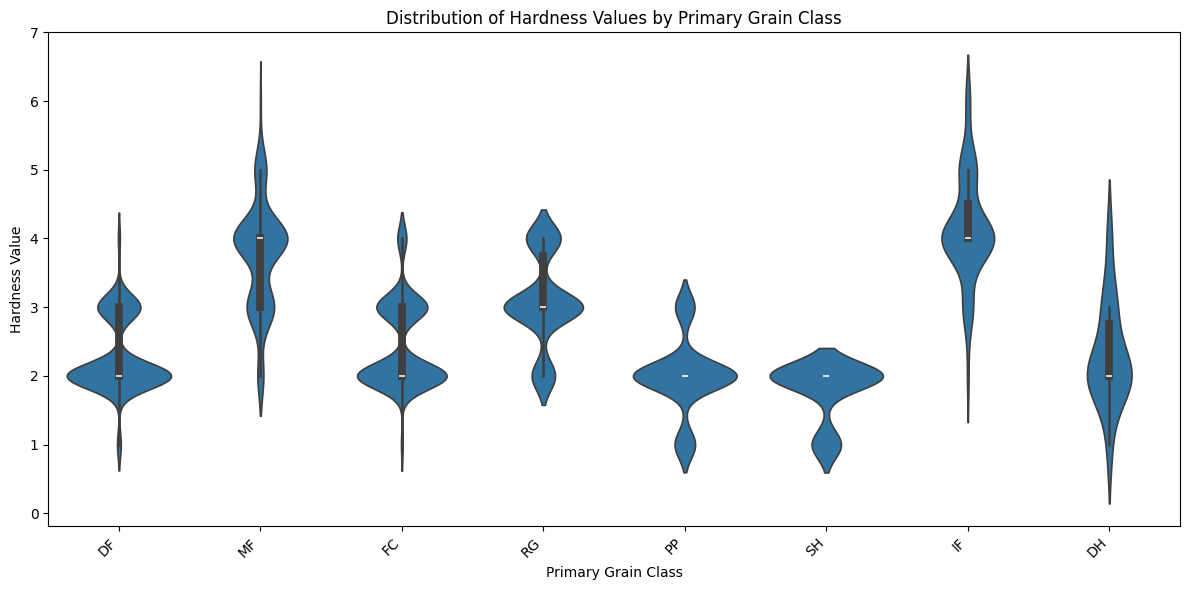

In [9]:
## Create Violin Plot

plt.figure(figsize=(12, 6))
sns.violinplot(x='grainFormPrimary_grainClass', y='hardness_val', data=df)

# Customize the plot
plt.title('Distribution of Hardness Values by Primary Grain Class')
plt.xlabel('Primary Grain Class')
plt.ylabel('Hardness Value')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent label cutoff

plt.show()